# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(768, 9)

# data preprocessing

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

independent variable

In [ ]:
x = df.iloc[:,0:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

dependent variables

In [ ]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

filling the dataset with mean value of the attribute

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerimputer= imputer.fit(x[:, 1:3])
x[:, 1:3]= imputer.transform(x[:, 1:3])
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 =df.apply(lambda col: le.fit_transform(col))
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             22             28        0  123   
1            1       23             19             22        0   62   
2            8      121             17              0        0   30   
3            1       27             19             16       62   77   
4            0       75              4             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1

In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

scl.fit(df1)
df2 = scl.transform(df1)
df2 = pd.DataFrame(df2, columns = df1.columns)
df2.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.3750  0.637037       0.478261           0.56  0.000000  0.497976   
1       0.0625  0.170370       0.413043           0.44  0.000000  0.251012   
2       0.5000  0.896296       0.369565           0.00  0.000000  0.121457   
3       0.0625  0.200000       0.413043           0.32  0.335135  0.311741   
4       0.0000  0.555556       0.086957           0.56  0.551351  0.846154   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.678295  0.568627      1.0  
1                  0.379845  0.196078      0.0  
2                  0.713178  0.215686      1.0  
3                  0.102713  0.000000      0.0  
4                  0.996124  0.235294      1.0

define x and y variables


In [ ]:
x = df2.drop('Outcome', axis = 'columns')
y = df2['Outcome']

In [ ]:
x.shape

(768, 8)

Split the data into train & test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

model1.fit(xtrain,ytrain)

print("Training Accuracy :- " , model1.score(xtrain,ytrain))
print("Test Accuracy :- " , model1.score(xtest,ytest))

Training Accuracy :-  0.8420138888888888
Test Accuracy :-  0.7239583333333334


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain , model1.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       375
         1.0       0.82      0.71      0.76       201

    accuracy                           0.84       576
   macro avg       0.83      0.81      0.82       576
weighted avg       0.84      0.84      0.84       576



In [ ]:
print(classification_report(ytest , model1.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       125
         1.0       0.61      0.57      0.59        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192






# Exploratory Data analysis(Identify patterns and insights)




In [ ]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             22             28        0  123   
1            1       23             19             22        0   62   
2            8      121             17              0        0   30   
3            1       27             19             16       62   77   
4            0       75              4             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.843750   59.322917      21.264323      15.535156   42.417969   
std       3.364678   30.510176       8.688687      13.111648   52.689353   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   37.000000      16.000000       0.000000    0.000000   
50%       3.000000   55.000000      22.000000      16.000000    8.500000   
75%       6.000000   78.250000      27.000000      25.000000   80.250000   
max      16.000000  135.000000      46.000000      50.000000  185.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean   112.104167                230.515625   12.227865    0.348958  
std     59.651199                143.031938   11.712724    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%     69.000000                113.750000    3.000000    0.000000  
50%    109.000000                208.500000    8.000000    0.000000  
75%    153.000000                349.250000   20.000000    1.000000  
max    247.000000                516.000000   51.000000    1.000000

In [ ]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df1['Outcome'].unique()
df1['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df1=df[df['Insulin']!=0]
df1=df[df['BloodPressure']!=0]
df1=df[df['Glucose']!=0]
df1=df[df['BMI']!=0]
df1=df[df['SkinThickness']!=0]

In [ ]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   541.000000  541.000000     541.000000     541.000000  541.000000   
mean      3.512015  119.822551      71.197782      29.153420  113.282810   
std       3.324759   32.894640      13.007678      10.476982  122.735833   
min       0.000000    0.000000       0.000000       7.000000    0.000000   
25%       1.000000   97.000000      64.000000      22.000000    0.000000   
50%       2.000000  115.000000      72.000000      29.000000   90.000000   
75%       5.000000  140.000000      80.000000      36.000000  165.000000   
max      17.000000  199.000000     110.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  541.000000                541.000000  541.000000  541.000000  
mean    32.774122                  0.504850   31.558226    0.332717  
std      7.144264                  0.346639   10.743768    0.471622  
min      0.000000                  0.085000   21.000000    0.000000  
25%     27.800000                  0.259000   23.000000    0.000000  
50%     32.800000                  0.417000   28.000000    0.000000  
75%     36.900000                  0.660000   38.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

scatter plot

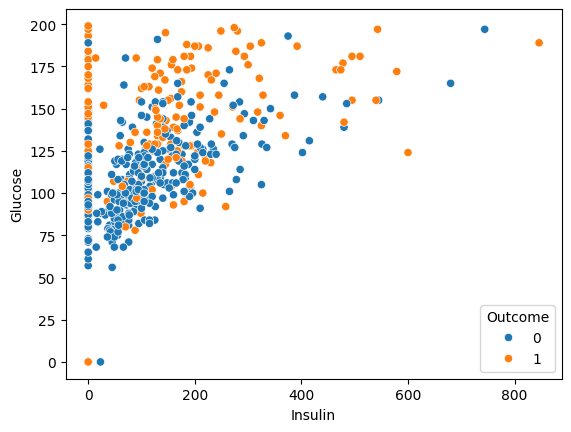

In [ ]:
import seaborn as sns
sns.scatterplot(data=df1,x="Insulin",y="Glucose",hue="Outcome")
plt.show()

pair plot

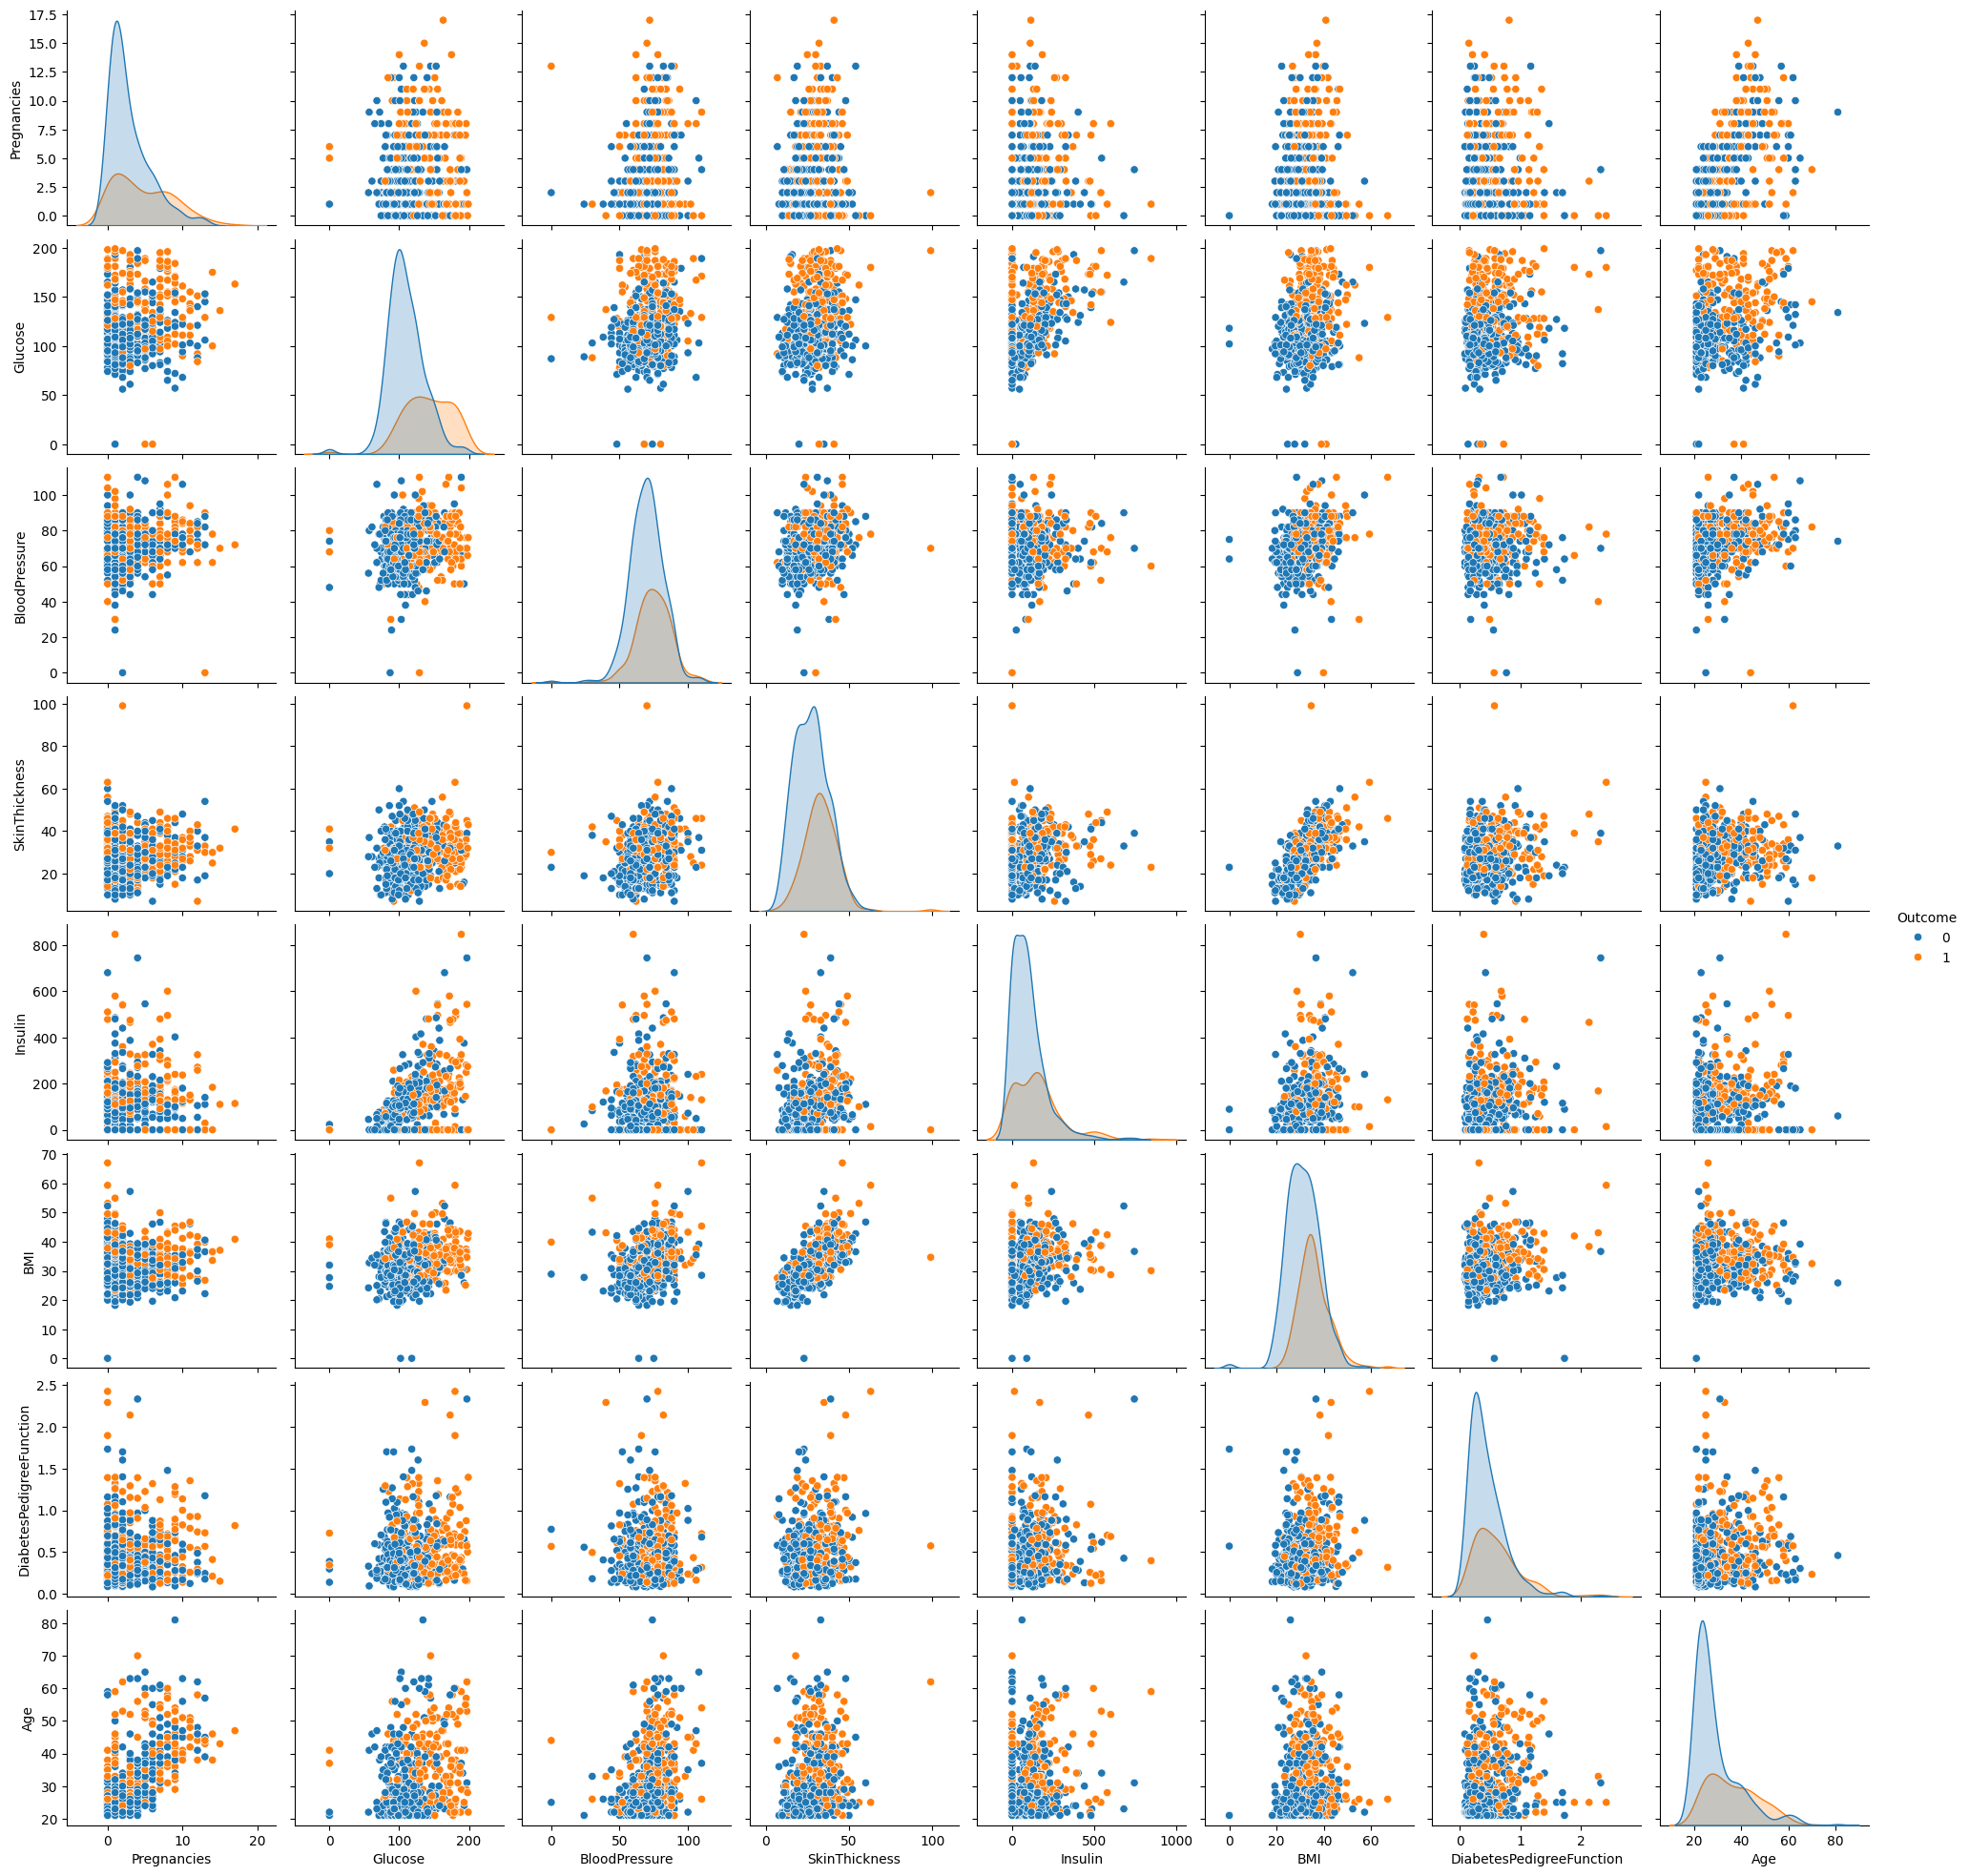

In [ ]:
sns.pairplot(df1,hue='Outcome')

In [ ]:
Diab_Yes = df1.loc[df1['Outcome']]
Diab_No = df1.loc[df1['Outcome']]

In [ ]:
Diab_Yes
Diab_No

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
0             6      148             72             35        0  33.6   
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
1             1       85             66             29        0  26.6   
..          ...      ...            ...            ...      ...   ...   
1             1       85             66             29        0  26.6   
0             6      148             72             35        0  33.6   
0             6      148             72             35        0  33.6   
0             6      148             72             35        0  33.6   
0             6      148             72             35        0  33.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
0                      0.627   50        1  
0                      0.627   50        1  
1                      0.351   31        0  
1                      0.351   31        0  
..                       ...  ...      ...  
1                      0.351   31        0  
0                      0.627   50        1  
0                      0.627   50        1  
0                      0.627   50        1  
0                      0.627   50        1  

[541 rows x 9 columns]

<Axes: >

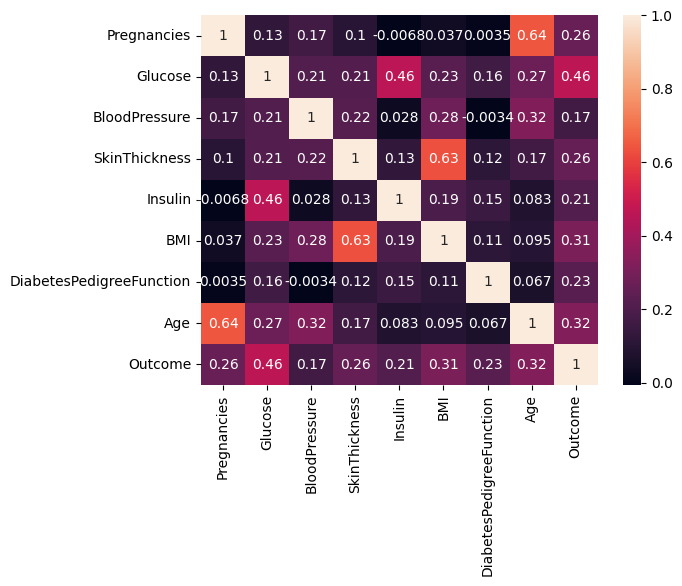

In [ ]:
corr = df1.corr()
sns.heatmap(corr,annot=True)

# Feature Selection Model building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected = selector.transform(x_test)

In [ ]:
selected_indices = selector.get_support(indices=True)
print(f"selected feature indices: {selected_indices}")

selected feature indices: [0 1 5 6 7]


In [ ]:
# building a model using selected features
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train_selected,y_train)

from sklearn.metrics import mean_squared_error
y_pred = model2.predict(x_test_selected)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print(f"model mean squared error with selected features: {mse:.2f}")

model mean squared error with selected features: 0.14


# Visualization and Analysis

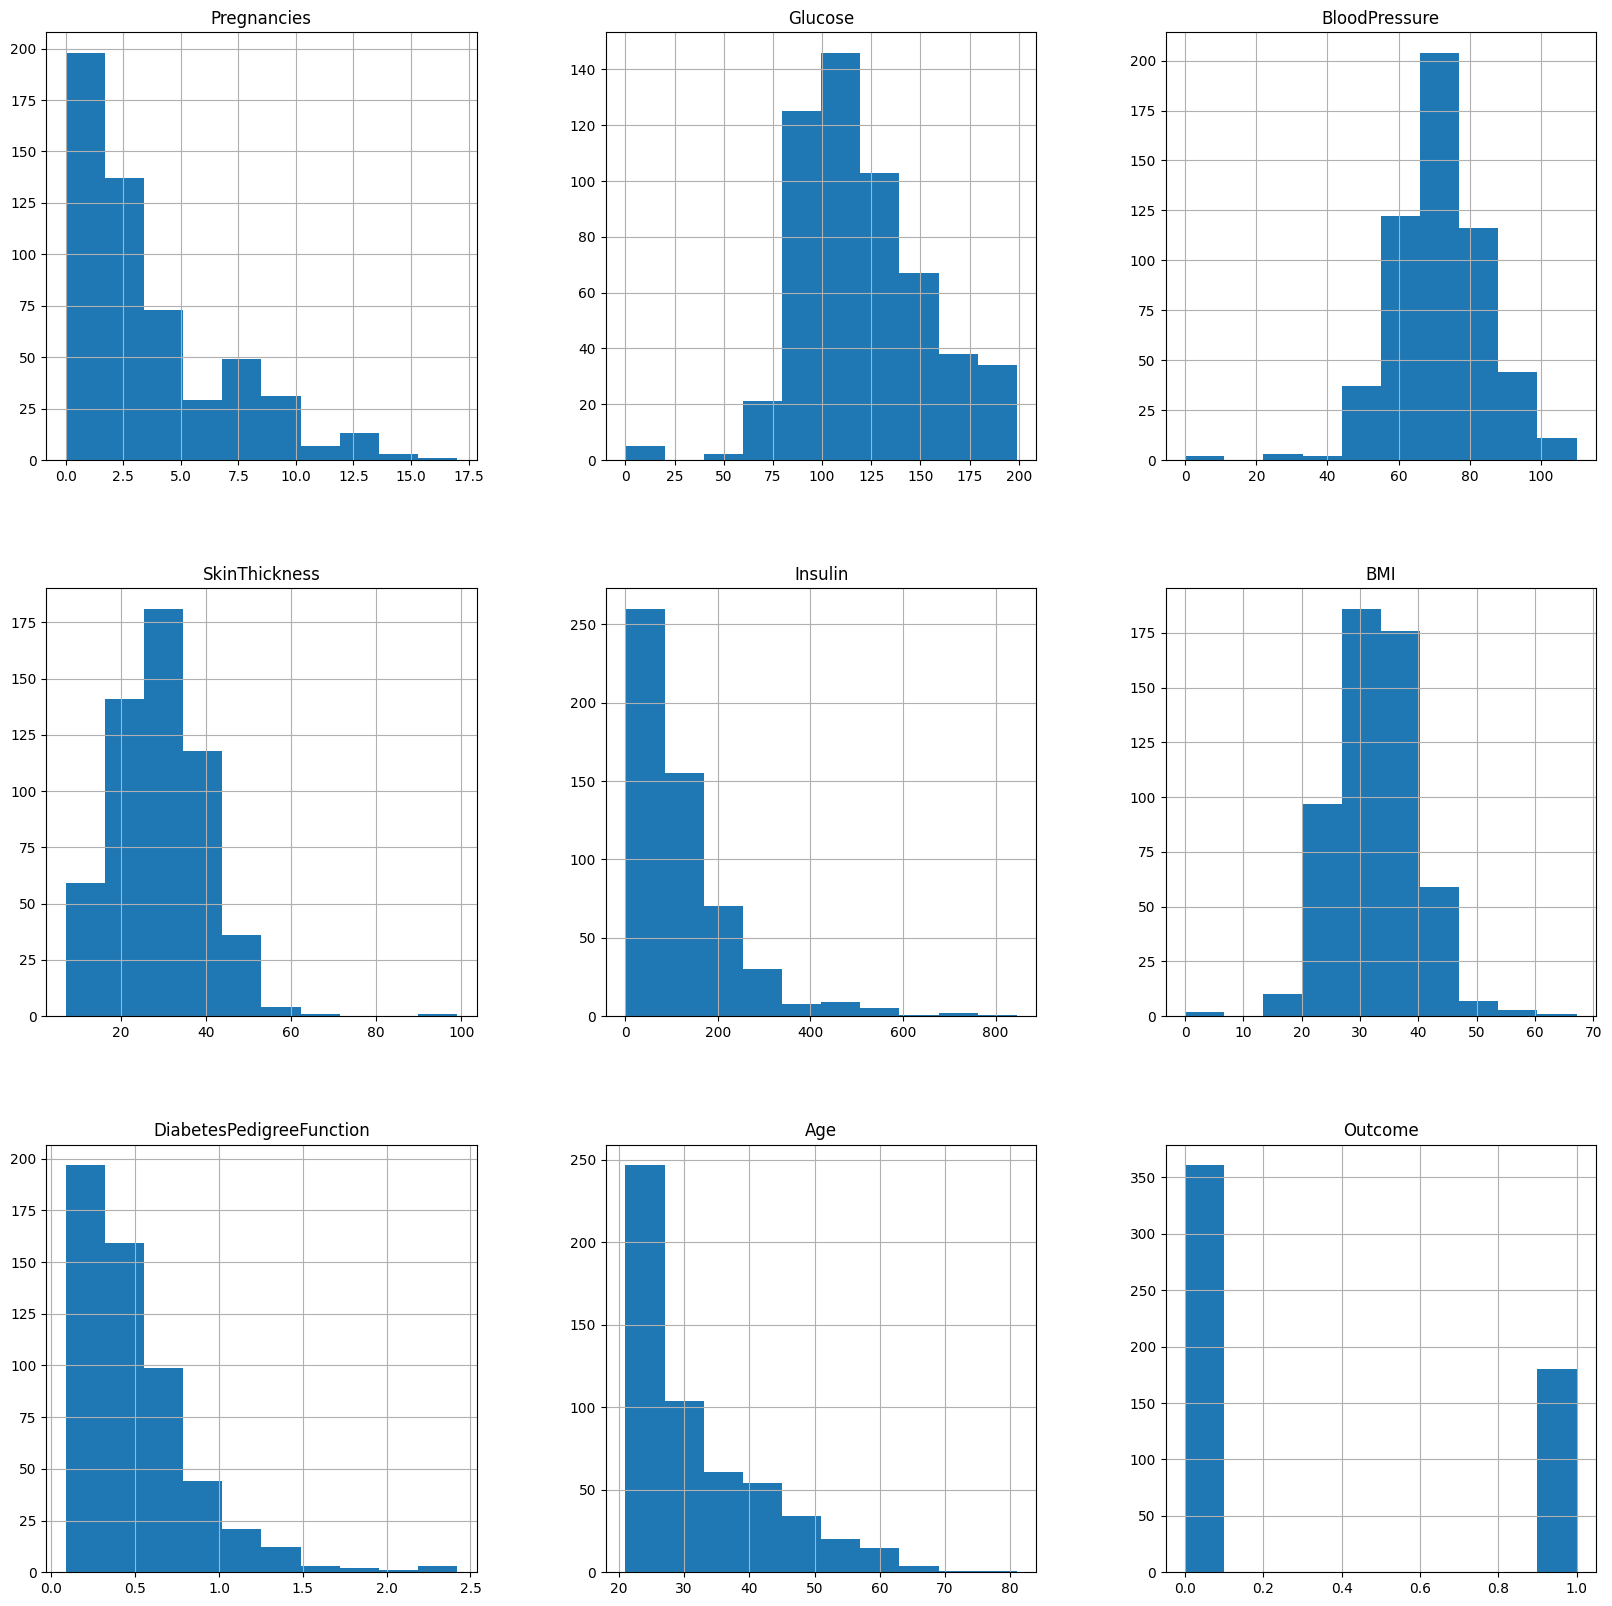

In [ ]:
# data visualization

p = df1.hist(figsize = (20,20))

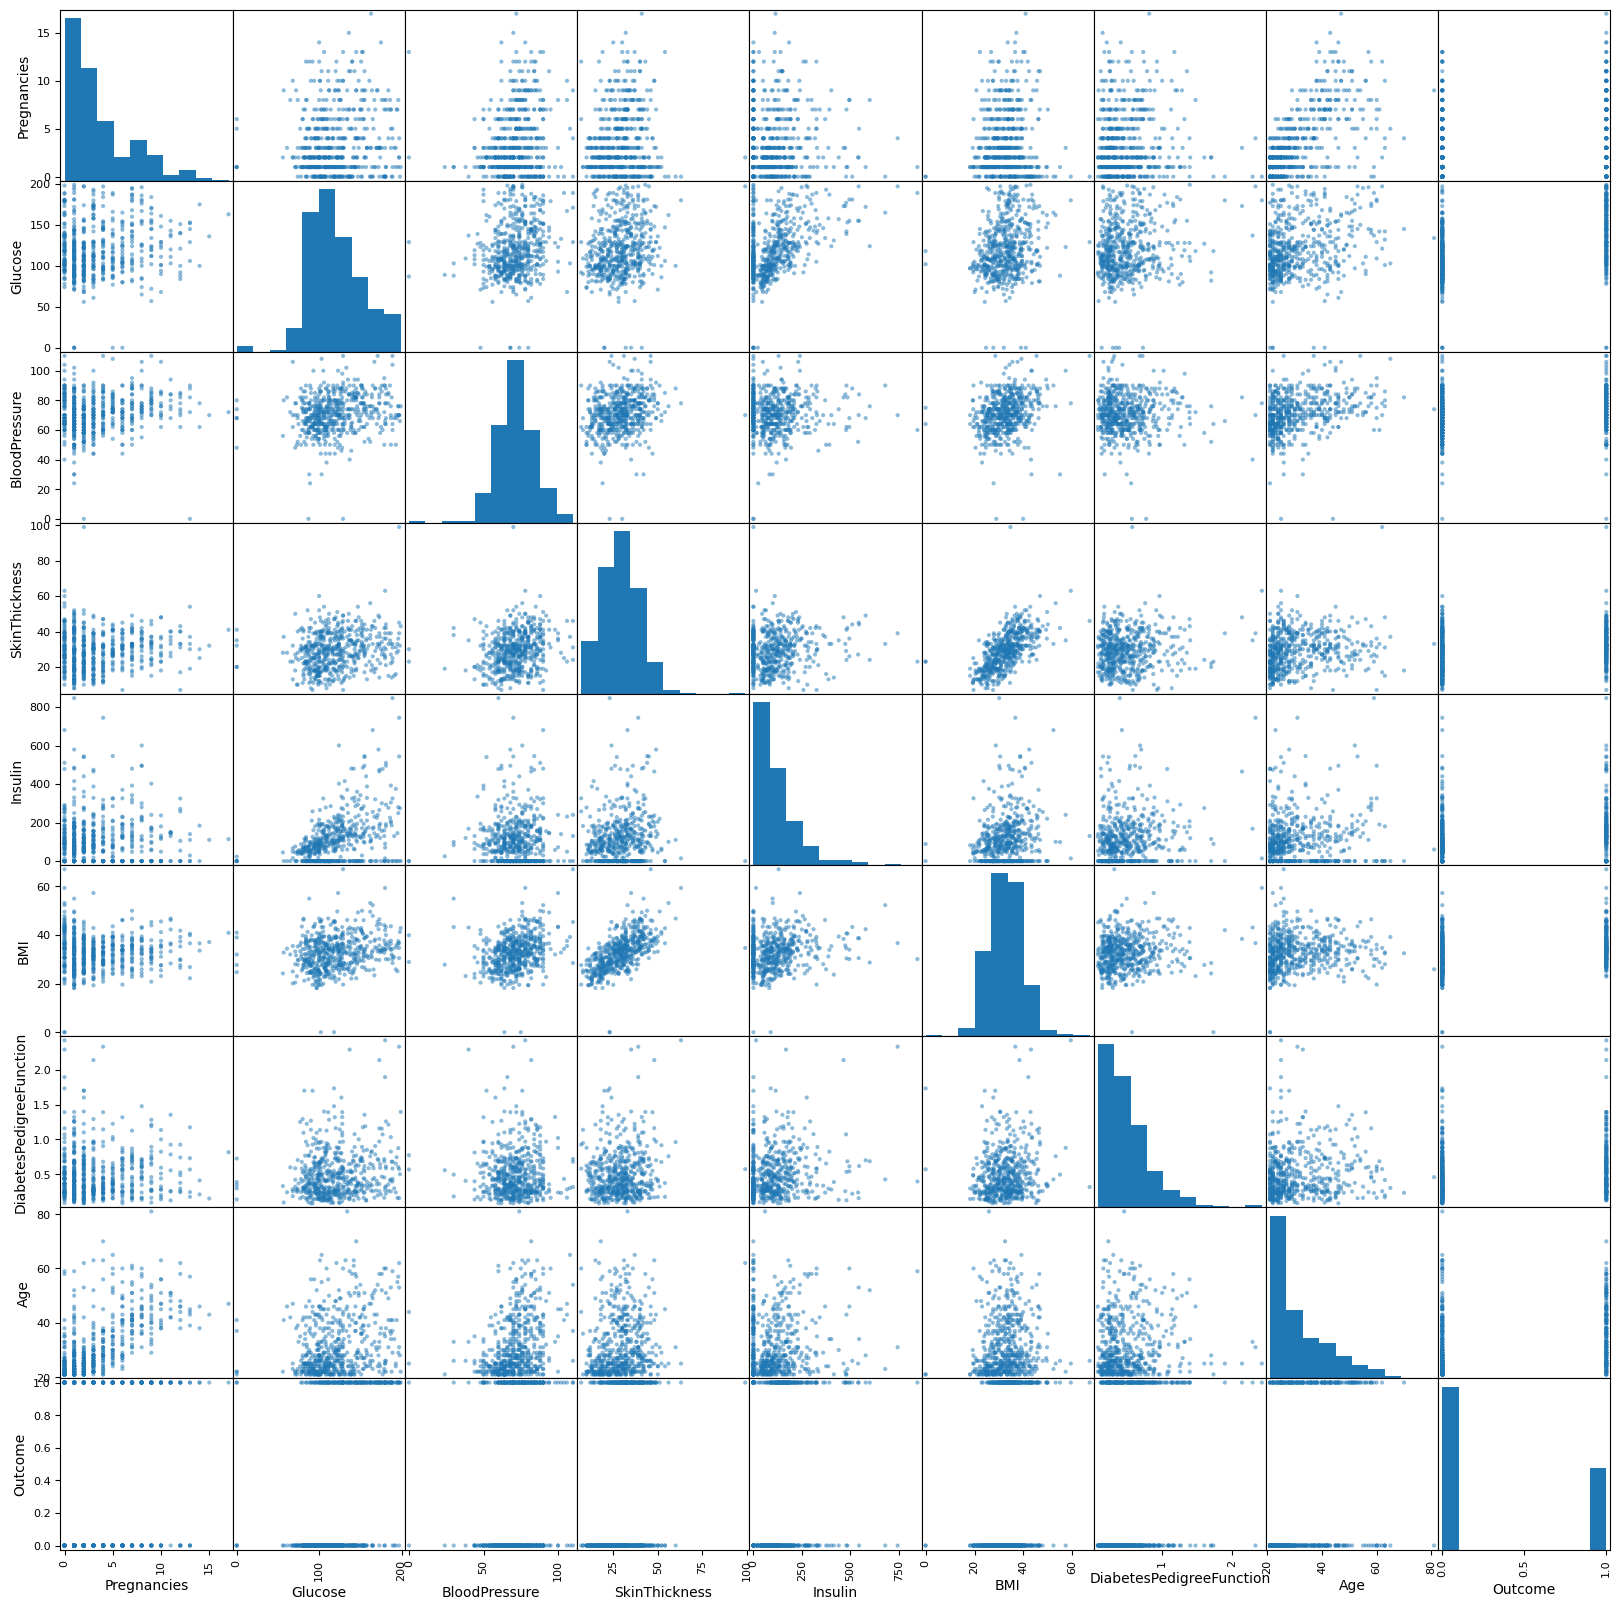

In [ ]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df1,figsize = (20,20))

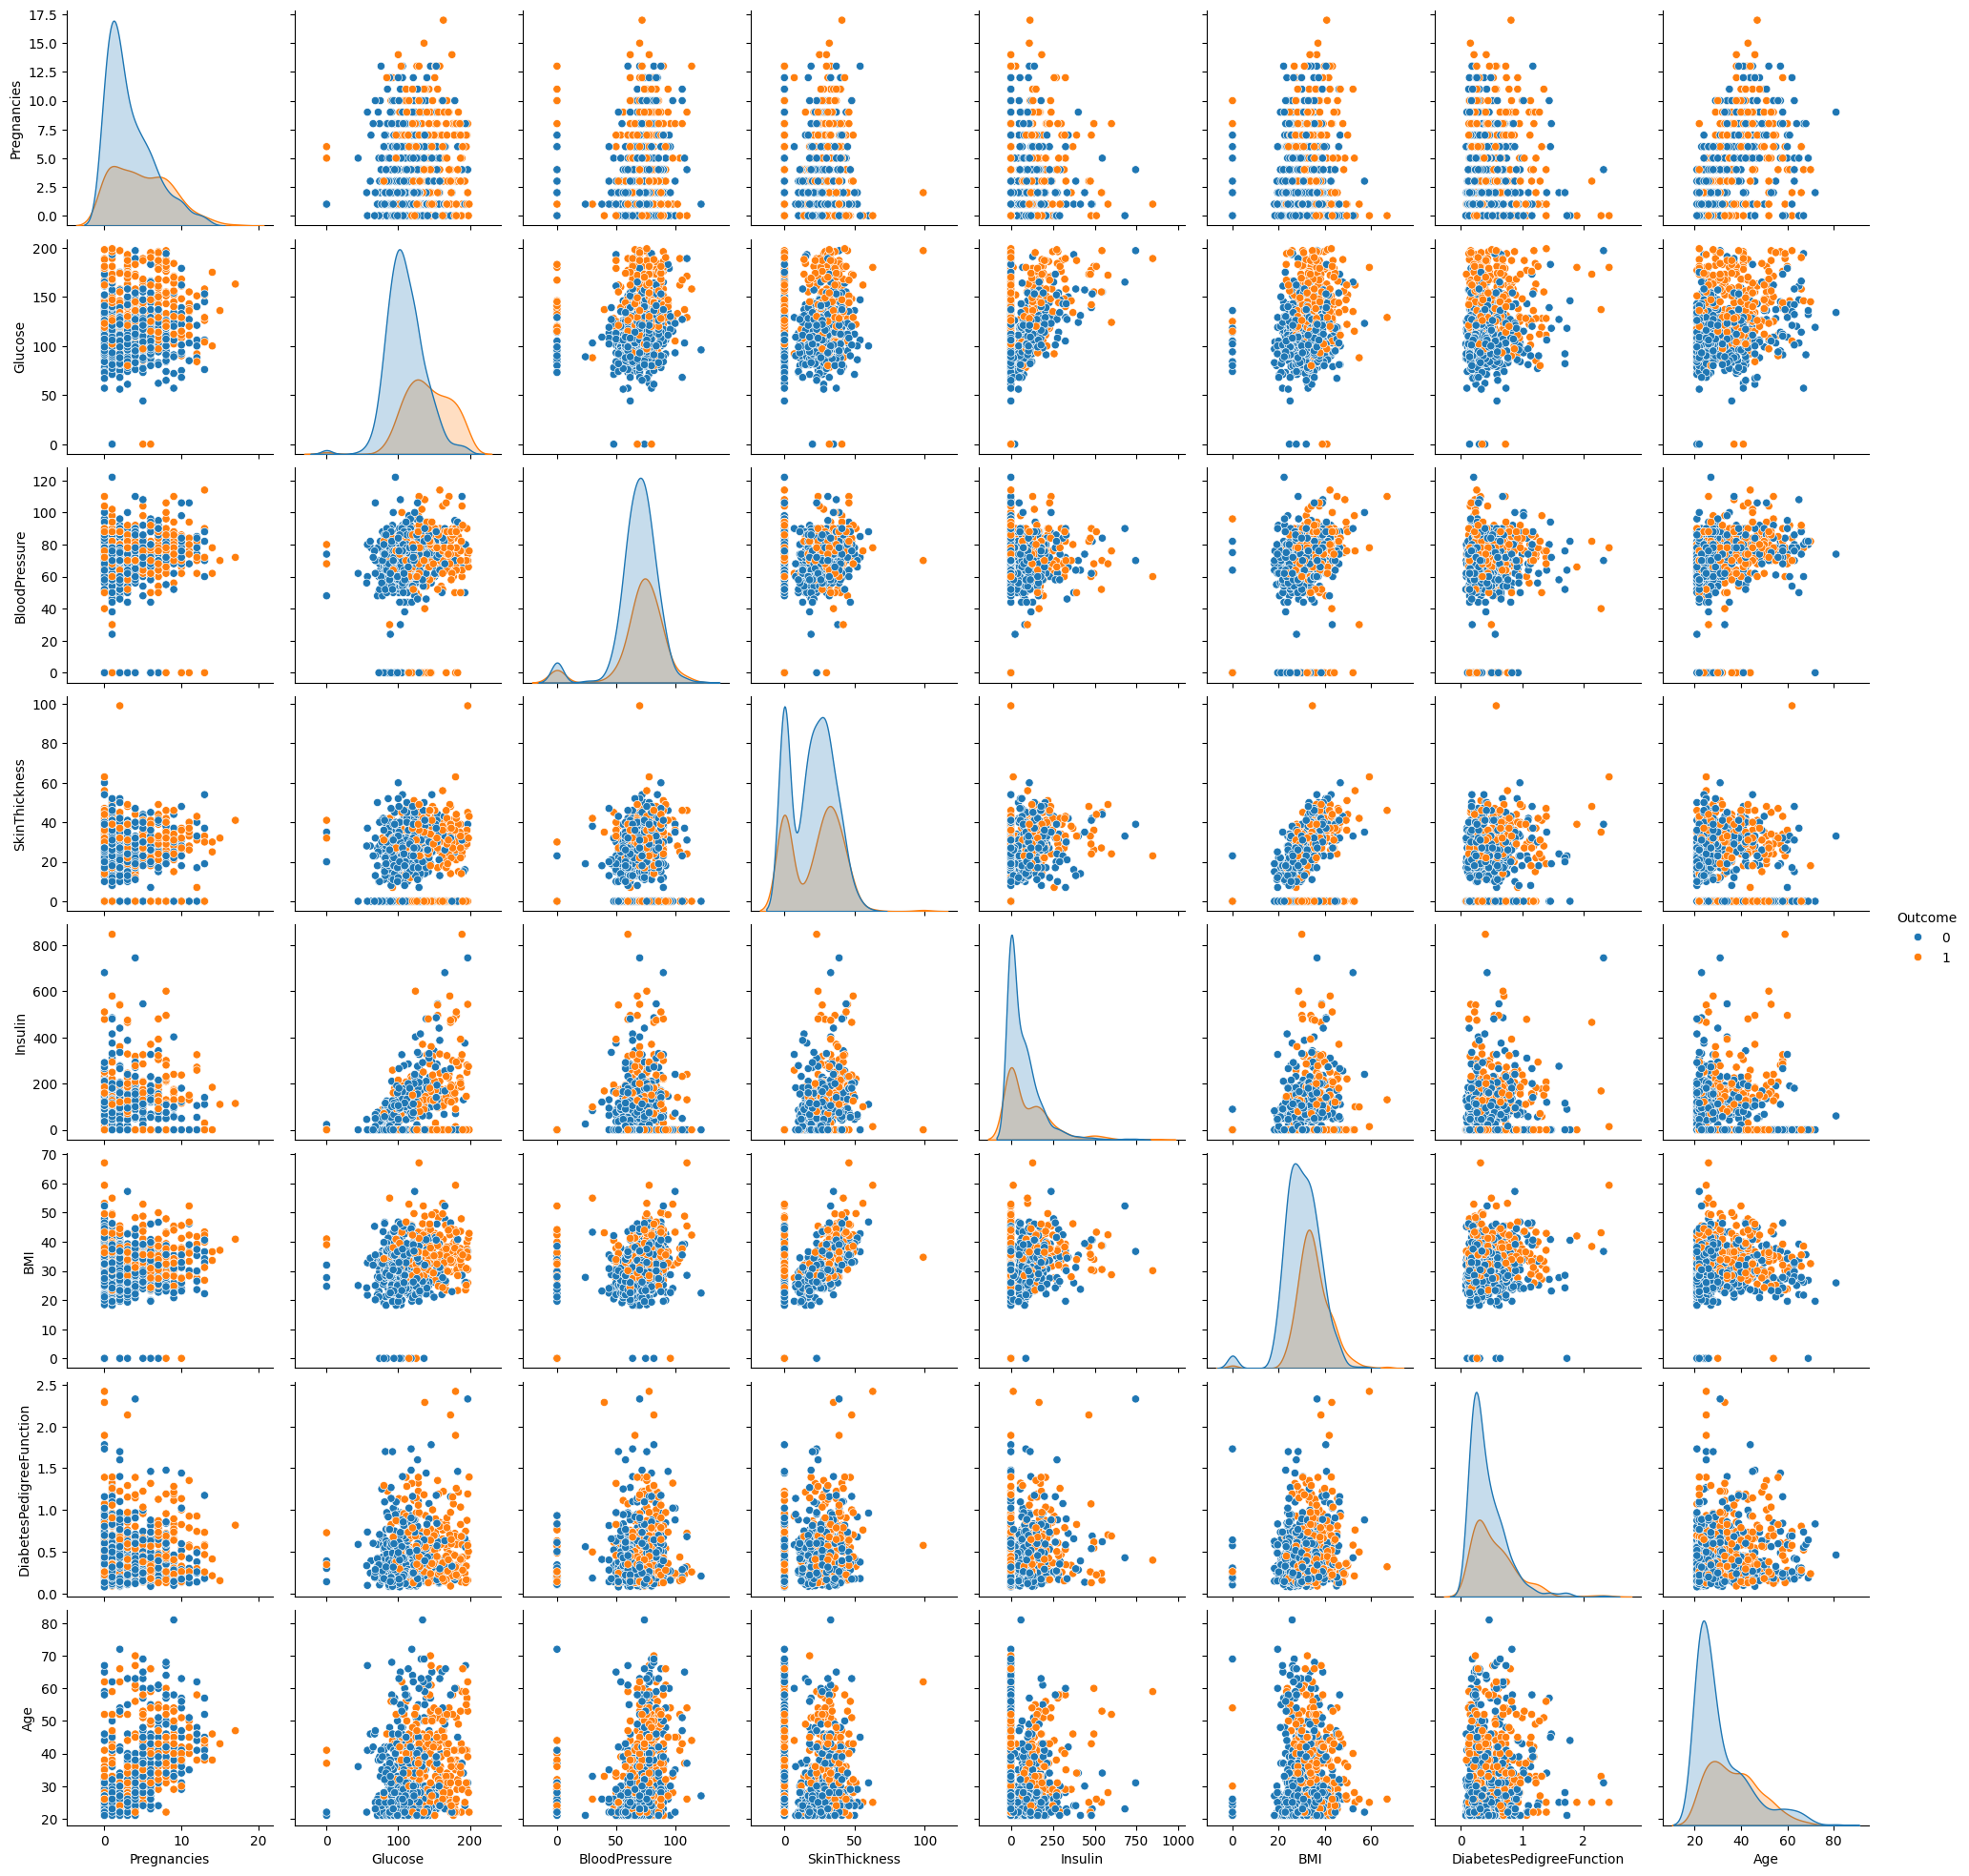

In [ ]:
p = sns.pairplot(df, hue = 'Outcome')

In [ ]:
# analysis
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               541 non-null    int64  
 1   Glucose                   541 non-null    int64  
 2   BloodPressure             541 non-null    int64  
 3   SkinThickness             541 non-null    int64  
 4   Insulin                   541 non-null    int64  
 5   BMI                       541 non-null    float64
 6   DiabetesPedigreeFunction  541 non-null    float64
 7   Age                       541 non-null    int64  
 8   Outcome                   541 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.4 KB


In [ ]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   541.000000  541.000000     541.000000     541.000000  541.000000   
mean      3.512015  119.822551      71.197782      29.153420  113.282810   
std       3.324759   32.894640      13.007678      10.476982  122.735833   
min       0.000000    0.000000       0.000000       7.000000    0.000000   
25%       1.000000   97.000000      64.000000      22.000000    0.000000   
50%       2.000000  115.000000      72.000000      29.000000   90.000000   
75%       5.000000  140.000000      80.000000      36.000000  165.000000   
max      17.000000  199.000000     110.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  541.000000                541.000000  541.000000  541.000000  
mean    32.774122                  0.504850   31.558226    0.332717  
std      7.144264                  0.346639   10.743768    0.471622  
min      0.000000                  0.085000   21.000000    0.000000  
25%     27.800000                  0.259000   23.000000    0.000000  
50%     32.800000                  0.417000   28.000000    0.000000  
75%     36.900000                  0.660000   38.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df1.describe().T

count        mean         std     min     25%  \
Pregnancies               541.0    3.512015    3.324759   0.000   1.000   
Glucose                   541.0  119.822551   32.894640   0.000  97.000   
BloodPressure             541.0   71.197782   13.007678   0.000  64.000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.000   
Insulin                   541.0  113.282810  122.735833   0.000   0.000   
BMI                       541.0   32.774122    7.144264   0.000  27.800   
DiabetesPedigreeFunction  541.0    0.504850    0.346639   0.085   0.259   
Age                       541.0   31.558226   10.743768  21.000  23.000   
Outcome                   541.0    0.332717    0.471622   0.000   0.000   

                              50%     75%     max  
Pregnancies                 2.000    5.00   17.00  
Glucose                   115.000  140.00  199.00  
BloodPressure              72.000   80.00  110.00  
SkinThickness              29.000   36.00   99.00  
Insulin                    90.000  165.00  846.00  
BMI                        32.800   36.90   67.10  
DiabetesPedigreeFunction    0.417    0.66    2.42  
Age                        28.000   38.00   81.00  
Outcome                     0.000    1.00    1.00